In [8]:
# House Sales Data, ETL, Build Predictive Model(linear regression), 
# Assess Model, Deploy Model   'houseSmallData.csv' and "data_description.txt"


In [18]:
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install sklearn


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Using cached sklearn-0.0.tar.gz (1.1 kB)
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 9.8 MB/s eta 0:00:00:00:010:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.2/34.2 MB 22.8 MB/s eta 0:00:0000:0100:01
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1304 sha256=c1b6d046221be86adf603e636b61bd0a49a202560ac2a471da6f07b01a97c5e3
  Stored in directory: /Users/johnwilliams/Library/Caches/pip/wheels/9b/13/01/6f3a7fd641f90e1f6c8c7cded057f3394f451f340371c68f3d
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### data_description.txt
SalePrice — the property’s sale price in dollars. This is the target variable that you’re trying to predict.  
MSSubClass — The building class  
MSZoning — The general zoning classification 
MasVnrArea - Masonary Veneer Area in sq ft
LotFrontage — Linear feet of street connected to property  
LotArea — Lot size in square feet  
Street — Type of road access  
Alley — Type of alley access  
LotShape — General shape of property  
LandContour — Flatness of the property  
Utilities — Type of utilities available  
LotConfig — Lot configuration  

$$Y = X_{1}\beta_{1} + X_{2}\beta_{2} + X_{3}\beta_{3}...$$

In [22]:
data = pd.read_csv('../house100Data.csv')
data.shape
train = data.iloc[0:20,:]
train.head()
# predict the price of the house
# 1. ETL    Extract, Transform, Load    (data cleaning)
# 2. Build Predictive Model (linear regression)
# 3. Assess Model
# 4. Deploy Model
test = data.iloc[20:100,:]
test.head()
# find null values
train.isnull().sum()
# find Nan values
train.isna().sum()
#list of columns with null values
train.columns[train.isnull().any()]
#remove columns with null values
train = train.dropna(axis=1)
#remove columns non-numeric
train = train.select_dtypes(include=[np.number])
#find columns with highest correlation with SalePrice
corr = train.corr()
corr['SalePrice'].sort_values(ascending=False)
#find top 4 columns with highest correlation with SalePrice
cols = corr['SalePrice'].sort_values(ascending=False)[0:5]
#set training data to top 4 columns
train = train[cols.index]
train.head()






,SalePrice,OverallQual,MasVnrArea,FullBath,TotRmsAbvGrd
0,208500,7,196.0,2,8
1,181500,6,0.0,2,6
2,223500,7,162.0,2,6
3,140000,7,0.0,1,7
4,250000,8,350.0,2,9


In [12]:
# investigate Sale Price
train['SalePrice']

0     208500
1     181500
2     223500
3     140000
4     250000
5     143000
6     307000
7     200000
8     129900
9     118000
10    129500
11    345000
12    144000
13    279500
14    157000
15    132000
16    149000
17     90000
18    159000
19    139000
Name: SalePrice, dtype: int64

(array([1., 6., 5., 1., 2., 1., 1., 1., 1., 1.]),
 array([ 90000., 115500., 141000., 166500., 192000., 217500., 243000.,
        268500., 294000., 319500., 345000.]),
 <BarContainer object of 10 artists>)

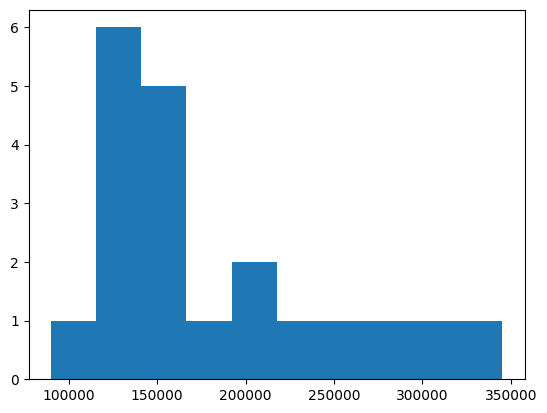

In [13]:
# plot hist
plt.hist(train['SalePrice'])

In [14]:
# select numeric columns
# calculate correlation factor
numeric = train.select_dtypes(include=[np.number])
numeric.shape

(20, 5)

In [15]:
corr = numeric.corr()
cols = corr['SalePrice'].sort_values(ascending=False)[0:3].index
cols

Index(['SalePrice', 'OverallQual', 'MasVnrArea'], dtype='object')

In [16]:
# pick out X cols and Y = SalePricee
X = train[cols]
Y = train['SalePrice']
X = X.drop(['SalePrice'], axis = 1)
X

,OverallQual,MasVnrArea
0,7,196.0
1,6,0.0
2,7,162.0
3,7,0.0
4,8,350.0
5,5,0.0
6,8,186.0
7,7,240.0
8,7,0.0
9,5,0.0


In [19]:
# buld Linear Regression Model
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(X, Y)
predictions = model.predict(X)

In [20]:
# How good is the model
model.score(X,Y)


0.7501993255220817

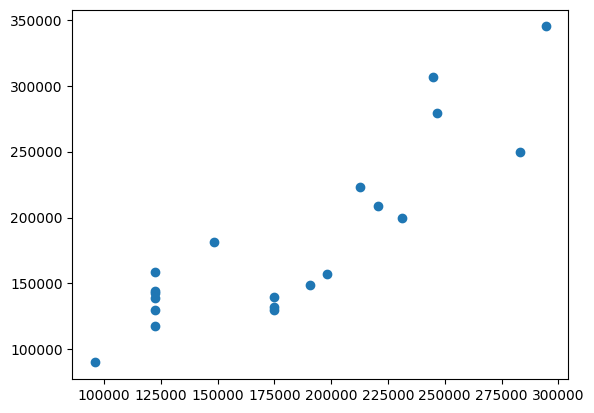

In [21]:
# Scatter plot of predictions
plt.scatter(predictions, Y)